# Common Data Structures in Python

There are many different data structures that are used in python. Most prominently used are `numpy arrays`, `pandas dataframes` and `dictionaries`.

In this notebook, we will talk about these and how they are used within the python language

![Numpy](../static/Numpy.png)

## Numpy Arrays

An array is a datastructure we can use to store `numerical` information in. Arrays can be n-dimensional, but typically they are 1- or 2-Dimensional. 2-Dimensional Arrays are very often used to represent images (images are only a combination of 0 (black values) and 255 (white values)). The typical structure of an 2-D Array is something we call a `row` and a `column`.

          This is a 1-Dimensional Array
          np.array([0,1,2,3])                     (1 Row, 4 columns; Data from 1 dog that evaluated her favorite snack)

          This is a 2-Dimensional Array
          np.array([[0,1,2,3],                    (2 Rows, 4 columns; Data from 2 dogs that evaluated their favorite snacks)
                    [4,5,6,7]])


What you can see in this example is actually nothing more than calling the `np.array()` function and passing a `list` [0,1,2,3] to it

Within a numpy array, the stored datatypes must be `homogeneous` meaning that they all need to belong to the same data type. Numpy arrays are optimized to be used for numerical computations.

Numpy arrays come with a `fixed size`! 

We will now start to explore the numpy environment and the numpy arrays.

So first, start by `importing numpy as np`

We will not work with real data *yet*, but rather simulate our own numpy arrays to work with. Numpy offers some really useful functions we can use to generate our arrays.

Lets start with the `numpy.random.rand` function.

They key argument we need to pass to the function is the `shape` of the array we want to create. Lets start by creating a 1-Dimensional Array first.

The first argument determines the number of *rows* we want our array to have, where as the second argument determines the number of columns.

### **Exercise 15.0**

Create a 1-D numpy array using the `rand` function from the `random` module (from the `numpy` package). Use it to create a numpy array with **1** Row and **20** Columns.

Assign your array to a variable called "RandomArray".

In [2]:
import numpy as np

We can also create arrays with zeros or ones

In [ ]:
np.zeros((1,5))
np.ones((1,5))

The information about the `shape` (e.g, how many rows and colum we have) is actually stored within the array element itself. We can access it with `array.shape`

In [10]:
RandomArray.shape

(1, 20)

Now in numpy, we can use the multiple methods to easily extract information

In [ ]:

RandomArray.min() #min value

RandomArray.max() #max value

RandomArray.argmin() #index of min value in that array

RandomArray.argmax() #index of max value in that array



Indexing a 1-Dimensional Numpy Array works similiar to `slicing` in lists.

          1D-Array[0] #element zero
          1D-Array[0:10] #elements zero to 10
          1D-Array[0:2:10]#elements zero to 10 in steps of 2

Technically, our RandomArray is a 2-D matrix. To access the first 10 columns we need to index like this

In [11]:
SlicedArray = RandomArray[:,:10]

          [: tells us, that we want to index into all rows of the array

          ,:10] tells us, that we want to index into the first 10 columns of the matrix

And we can also use the `np.arange` function to create a numpy array with values in a given range

In [12]:
values = np.arange(0,10)
values, values.dtype

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), dtype('int32'))

Since SlicedArray and values have the same shape, we can perform any mathematical operation with them.

The operations are `element wise`. So first element of matrix 1 * first element of matrix 2 and so on.

In [13]:
values * SlicedArray

array([[0.        , 0.27416264, 0.65348972, 2.38691933, 0.05090751,
        4.33516312, 3.4804216 , 6.213112  , 3.76518539, 7.90406815]])

We can also use logicals to compare and access numpy arrays

In [31]:
values > SlicedArray

array([[False,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

This returns an array of `boolean` values, where the condition is either `True` or `False`.
We can use this output of boolean values as a `mask`. Masks are basically an accelarated version of `if element in list, append to another list, else append to another list` thing we practised before.

Disadvantage: This mask performs the comparison element by element.

In [43]:
mask = values > SlicedArray
values.reshape(1,10)[mask]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [59]:
for idx, element in enumerate(values):
          if element > SlicedArray[0][idx]:
                    print(element)
          else:
                    continue

1
2
3
4
5
6
7
8
9


Another example for that

In [ ]:
menu = np.array(["Espresso", "Latte", "Cappuccino", "Americano", "Mocha"])
orders = np.random.choice(menu, size=50)

In [64]:
orders_loop = []
for i in range(50):
          ran = np.random.randint(0,menu.shape[0])
          orders_loop.append(menu[ran])
orders_loop = np.array(orders_loop)
orders_loop,orders

(array(['Latte', 'Americano', 'Latte', 'Espresso', 'Latte', 'Mocha',
        'Cappuccino', 'Cappuccino', 'Mocha', 'Cappuccino', 'Mocha',
        'Latte', 'Espresso', 'Mocha', 'Latte', 'Americano', 'Americano',
        'Cappuccino', 'Mocha', 'Latte', 'Espresso', 'Cappuccino', 'Mocha',
        'Mocha', 'Espresso', 'Mocha', 'Mocha', 'Cappuccino', 'Mocha',
        'Mocha', 'Americano', 'Cappuccino', 'Latte', 'Mocha', 'Espresso',
        'Cappuccino', 'Espresso', 'Cappuccino', 'Espresso', 'Cappuccino',
        'Latte', 'Cappuccino', 'Americano', 'Cappuccino', 'Cappuccino',
        'Latte', 'Cappuccino', 'Latte', 'Espresso', 'Cappuccino'],
       dtype='<U10'),
 array(['Mocha', 'Latte', 'Latte', 'Americano', 'Latte', 'Cappuccino',
        'Cappuccino', 'Mocha', 'Americano', 'Cappuccino', 'Espresso',
        'Latte', 'Cappuccino', 'Mocha', 'Americano', 'Cappuccino',
        'Cappuccino', 'Mocha', 'Latte', 'Mocha', 'Americano', 'Americano',
        'Cappuccino', 'Americano', 'Americano', 'Latt

So as you can see, its basically just a for loop, sort of! Most of numpy is actually written in the programming language `C`. TDLR: Python has the ability to call C functions (which are much faster, than vanilla Python Syntax). The C Functions are simply `wraped` in python functions, which makes them easy to use!

### **Exercise**

Using the `np.arange` function, create one numpy array with values from 1 to 512 in steps of 2 and call the variable "all_scores".

Create another numpy array with values from 1 to 257 in steps of 1 and call it high_scores.

Your task is to find out, which values from `high_scores` are actually in `all_scores`.

Create a `mask` of boolen values, which should be True if an element of high_scores is in all_scores, and False otherwise. Use the `np.isin(firstarray,secondarray)` function to create the mask. 
Which array should you pass as the first argument, and which as the second? Use `np.isin?` to find out!

Use this mask to create a new array called `valid_high_scores`. How do these array differ in their shape and distribution (mean+standard deviation)?

### **Exercise**

Create a numpy array of 9 numbers using `np.arange`. Reshape it to a 2D matrix of the shape (3,3).

**Hint**: Use the `np.array.reshape()` method.

### **Exercise**

       array([[ 1,  2,  3,  4],
              [ 5,  6,  7,  8],
              [ 9, 10, 11, 12]])

What element woud you expect to see if we index into the array using (array[2,3]) ?

**Type your answer here**

### **Exercise**

Create a numpy array with random integers between 1 and 255, with the shape 64,64.

**Hint**: Use the `np.random.randint` function

(3, 4)

![pandas](../static/Pandas.png)

## Pandas


So pandas is *the* python library you want to use for organizing, manipulating and analyzing your datasets. The standard datatype used in pandas are `dataframes`.
Pandas dataframes are basically like an excel sheet, but way, way better.

In this section, we will download a dataset and use this to explore dataframes and apply what we have learned so far.

But first the basic import:

          import pandas as pd

This is the way to go. Again, you can use what ever abbreviation you want to, but I dont think I saw any code where some just used `pandas.xyz` or `pandas as p` or something strange like that.


In [44]:
import pandas as pd

Before transitioning to the dataset, you should know a thing or two about `pandas`.

The cool thing here is that you actually *convert* `lists` or `numpy arrays` to a `dataframe`.

What you usually want to do is put your lists or arrays in to a `dictionary`. A dictionary is a further vanilla python datatype. Its syntax goes like this:

          dictionary = {"Participant Number":[0,1,2,3,4],
                        "Reaction times":[100,50,76,34,95]}      

The string input is what we call a `key` (Participant Number, Reaction times) The key basically stores the values that are associated with it. We wont focus on dictionaries too much here, but you should know, that a dictionary can store values (or lists of values, or arrays) in so called keys.

What we can now do is create a `dataframe` from this dictionary.

In [121]:
'''This code cell created a dictionary called reaction_time_dictionary. It has two keys called Participant_number and Reaction_times. 
The values are created by using the np.arange function, which gives values from (start) to (stop). We randomly create reaction time values using the np.random.rand function. 
The array needs to be reshaped into a 1-D Vector, so it can be passed to the pd.DataFrame() method.

'''
coffee_order_dictionary = {
    "Customer_ID": np.arange(1, 51),
    "Drink": np.random.choice(
        ["Latte", "Espresso", "Cappuccino", "Americano", "Mocha"], size=50),
    "Size": np.random.choice(["Small", "Medium", "Large"], size=50), #np.random.choice picks one element at a time at random
    "Time_to_prepare_sec": np.random.randint(60, 300, size=50)
}
dataframe = pd.DataFrame(coffee_order_dictionary)

So the expected shape of our dataframe should look like this!

![df](../static/pandas_table.svg)

We can use the `dataframe.head(n=n)` method to display the first n-entries of our dataframe. 

In [72]:
dataframe.head(n=10)

,Customer_ID,Drink,Size,Time_to_prepare_sec
0,1,Espresso,Small,92
1,2,Americano,Small,89
2,3,Cappuccino,Large,198
3,4,Cappuccino,Large,223
4,5,Cappuccino,Large,286
5,6,Cappuccino,Large,102
6,7,Latte,Small,100
7,8,Latte,Medium,271
8,9,Mocha,Small,282
9,10,Latte,Small,257


You can again use the `?` here to gather more information about your dataframe.

In [75]:
dataframe?

Type:        DataFrame
String form:
Customer_ID       Drink    Size  Time_to_prepare_sec
           0            1    Espresso   Small        <...>        Mocha   Small                  282
           9           10       Latte   Small                  257
Length:      10
File:        c:\users\janos\anaconda3\lib\site-packages\pandas\core\frame.py
Docstring:  
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is aligned by its index.

    .. versionchanged

You can see, that this object is neatly organized. It has two columns, which corespond to the `keys` from our `reaction_time_dictionary`. With this dataframe, we now have the opportunity to do many differnt things. But, this would be pretty boring based on this dataframe. So we will load a different one in and check out pandas functionalities based on it.

The code we are using to obtain this data is not in `python` but [`bash`](https://wiki.ubuntuusers.de/Bash/).

In [ ]:
!curl url https://raw.githubusercontent.com/JNPauli/IntroductionToPython/refs/heads/main/content/datasets/Stadt_Koeln_Statistischer_Datenkatalog.csv

<html><body><h1>400 Bad request</h1>
Your browser sent an invalid request.
</body></html>


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0curl: (6) Could not resolve host: url
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    90  100    90    0     0    290      0 --:--:-- --:--:-- --:--:--   294


We now have temporarily download the `Stadt_Koeln_Statistischer_Datenkatalog.csv` file in our google colab session.
This also means, that we can now load it into a pandas dataframe. The function we want to use for that is called 

          pd.read_csv(yourfilename)

So use that this function to read the `Stadt_Koeln_Statistischer_Datenkatalog.csv` file. Store it in a dataframe called `koeln_stats`.

Sometimes, when reading in a .csv file, we need to pass the `sep` argument. This helps us from preventing that all columns will end up in a single one, thus rendering the dataframe useless. The `sep` argument tells pandas, based on what seperator it should read in the columns.

In [77]:
koeln_stats = pd.read_csv(
          "https://raw.githubusercontent.com/JNPauli/IntroductionToPython/refs/heads/main/content/datasets/Stadt_Koeln_Statistischer_Datenkatalog.csv",
                    sep=";")

C:\Users\janos\AppData\Local\Temp\ipykernel_5268\989657012.py:1: DtypeWarning: Columns (9,11,13,15,17,19,23,24,26,28,30,31,33,34,38,42,43,45,47,49,50,52,53,56,62,64,66,67,69,72,77,78,79,82,87,89,91,98,101,102,105,106,107,108,110,113,115,118,119,123,124,125,126,127,128,129,136,137,138,139,140,141,143,145,146,158,159,160,161,167,168,169,170,171,173,174) have mixed types. Specify dtype option on import or set low_memory=False.
  koeln_stats = pd.read_csv(


Because the column descriptions of the `koeln_stats` dataframe are not informative at all, we also need to download the descriptions df and read it into a pandas dataframe called `koeln_stats_description`. This will be useful later on.

In [76]:
koeln_stats_description = pd.read_csv(
          "https://raw.githubusercontent.com/JNPauli/IntroductionToPython/refs/heads/main/content/datasets/Beschreibung_Statistischer_Datenkatalog.csv",
          sep=";")

We can display our newly obtained by either simply typing and running koeln_stats in a code cell. If you are only interested in viewing the *n-th* first or last elements of your dataframe, you can use `df.head(n=n)` or `df.tail(n=n)`, respectively.

In [17]:
koeln_stats.head(n=10)

,S_JAHR,S_RAUM,RAUM,S_RAUMEBENE,RAUMEBENE,A0002A,A0002P,A0022S,A0025A,A0027A,...,H0051S,H0052S,B0003A,B0004A,B0009A,B0022S,B0023S,B0025A,B0026P,B0026A
0,2012,0,0 / Stadt Köln,0,Gesamtstadt,180415.0,"17,271948","41,90013762",1044555.0,46426,...,"87,059374","483,255",5944,2941,3114,"39,40239241","75,57050842",544630.0,"7,522905",40972
1,2012,1,1 / Innenstadt,1,Stadtbezirke,21712.0,"16,985457","40,86903262",127827.0,4428,...,"93,269732","458,447",566,296,193,"40,39537813","63,87377692",80841.0,"2,508628",2028
2,2012,2,2 / Rodenkirchen,1,Stadtbezirke,14788.0,"14,337793","43,45253054",103140.0,5331,...,"91,860767","569,468",1187,450,348,"44,27280396","85,89885062",53159.0,"3,397355",1806
3,2012,3,3 / Lindenthal,1,Stadtbezirke,14132.0,"9,872231","42,06031943",143149.0,6787,...,"91,920257","525,04",1172,689,848,"45,80771085","82,08048668",79889.0,"1,126563",900
4,2012,4,4 / Ehrenfeld,1,Stadtbezirke,19811.0,"18,779445","40,54831047",105493.0,3935,...,"83,775698","449,053",439,365,293,"36,15031329","69,38747475",54961.0,"12,57437",6911
5,2012,5,5 / Nippes,1,Stadtbezirke,20676.0,"18,145597","42,27830898",113945.0,5154,...,"84,574078","491,482",214,52,114,"37,56269253","71,26460647",60059.0,"7,341114",4409
6,2012,6,6 / Chorweiler,1,Stadtbezirke,14892.0,"18,409049","42,06668212",80895.0,3493,...,"84,421093","499,165",319,113,189,"37,27096854","87,33156645",34524.0,"23,473525",8104
7,2012,7,7 / Porz,1,Stadtbezirke,16613.0,"15,235833","43,36416022",109039.0,5084,...,"84,779095","553,792",453,147,316,"39,70796687","82,05816466",52764.0,"5,069744",2675
8,2012,8,8 / Kalk,1,Stadtbezirke,29259.0,"25,468077","40,73158448",114885.0,5163,...,"82,43595","377,211",915,441,417,"35,27169778","73,36004852",55237.0,"12,618353",6970
9,2012,9,9 / Mülheim,1,Stadtbezirke,28532.0,"19,518135","41,96456415",146182.0,7051,...,"81,935198","420,681",679,388,396,"36,80407985","73,50256845",73196.0,"9,794251",7169


In [ ]:
koeln_stats.tail(n=10)

As you can see here, a dataframe looks strikingly similar to a file you would expect in a excel sheet. It has a bunch of rows and columns, and in each column there is some information stored. 

We can further examine the type and shape (rows and columns) of our dataframe by using the `df.info` method.

In [18]:
koeln_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8208 entries, 0 to 8207
Columns: 175 entries, S_JAHR to B0026A
dtypes: float64(27), int64(7), object(141)
memory usage: 11.0+ MB


This method gives us information about the number of columns, the datatype (Dtype) for each column and how many entries (rows) there are. This is super helpful to get an idea with what kind of data we are dealing with.

However, the returned datatype (`dtypes: float64(27), int64(7), object(141)`) refers to the `values` within each column. `Object` = Mixed Information (Strings and integers, for example)

The datatype of a column *itself* is a `pandas.Series`.

![Series](../static/01_table_series.svg)

To access a column of the dataframe, we have two options. 

The first one being `df.column` (replace *df* with your own dataframe!!). However this only works, if you column name has no spaces or extra characters!

So we could use `koeln_stats.RAUM` but we can also use `koeln_stats["RAUM"]`. The output of these operations is equivalent!

In [20]:
print(f"the datatype of the column RAUM is {type(koeln_stats.RAUM)}")

the datatype of the column RAUM is <class 'pandas.core.series.Series'>


We can seperately extract the column names with `df.columns`.

In [22]:
koeln_stats.columns

Index(['S_JAHR', 'S_RAUM', 'RAUM', 'S_RAUMEBENE', 'RAUMEBENE', 'A0002A',
       'A0002P', 'A0022S', 'A0025A', 'A0027A',
       ...
       'H0051S', 'H0052S', 'B0003A', 'B0004A', 'B0009A', 'B0022S', 'B0023S',
       'B0025A', 'B0026P', 'B0026A'],
      dtype='object', length=175)

We can also directly convert them to a `list` by calling the `to_list()` method!

In [ ]:
columns_list = koeln_stats.columns.to_list()
type(columns_list)

And in principle, we can now use this list to get a subset of our dataframe, extracting only the first two columns.

In [24]:
koeln_stats[columns_list[:2]]

,S_JAHR,S_RAUM
0,2012,0
1,2012,1
2,2012,2
3,2012,3
4,2012,4
...,...,...
8203,2023,908030001
8204,2023,909010001
8205,2023,909030001
8206,2023,909030002


df.describe() can be used to get a numerical overview of all values in our dataframe

In [25]:
koeln_stats.describe()

,S_JAHR,S_RAUM,S_RAUMEBENE,A0002A,A0025A,A0109A,A0153A,A0213A,A0267A,A0273A,...,A0368A,A0371A,A0372A,D0011A,E0001A,H0001A,H0028A,H0035A,H0037A,B0025A
count,8208.000000,8.208000e+03,8208.000000,8196.000000,8.196000e+03,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000,...,8196.000000,8196.000000,8196.000000,7521.000000,3585.000000,8208.000000,8208.000000,8208.000000,8208.000000,1152.000000
mean,2017.500000,4.189774e+08,2.869883,1628.660200,8.318157e+03,4065.875183,3316.983895,4252.281357,4305.391654,2170.981088,...,2091.822108,1544.880429,1929.161420,3121.976067,1914.584937,3569.965278,1145.536672,3678.312987,4162.920565,17469.364583
std,3.452263,3.057064e+08,0.448253,10005.266938,5.364302e+04,26190.671566,20466.568673,27453.609225,28116.264634,14466.672940,...,13533.776996,9915.131324,12597.687426,20452.365737,8033.686600,23691.875428,7631.040179,24474.817459,27692.863611,58296.342893
min,2012.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,15.000000,26.000000,5.000000,0.000000,7.000000,10.000000,477.000000
25%,2014.750000,1.050100e+08,3.000000,213.750000,1.557000e+03,757.000000,494.000000,799.000000,794.750000,332.000000,...,376.000000,277.000000,347.000000,577.000000,289.000000,582.000000,193.000000,583.000000,667.000000,3192.750000
50%,2017.500000,4.010400e+08,3.000000,343.000000,1.985500e+03,970.500000,724.000000,1011.000000,1036.000000,520.000000,...,498.000000,365.000000,460.000000,746.000000,489.000000,790.000000,280.000000,796.000000,910.000000,5510.000000
75%,2020.250000,7.062975e+08,3.000000,636.000000,2.547000e+03,1258.000000,1250.000000,1300.000000,1347.000000,791.000000,...,670.250000,517.000000,613.000000,997.000000,1240.000000,1218.500000,406.000000,1263.250000,1438.250000,10561.500000
max,2023.000000,9.090300e+08,4.000000,228555.000000,1.095520e+06,535040.000000,463966.000000,560480.000000,571643.000000,295808.000000,...,280662.000000,201187.000000,262040.000000,444241.000000,112580.000000,491747.000000,158808.000000,523797.000000,585118.000000,572090.000000


Indexing and masking in pandas dataframes works a bit like in a numpy array. We can also extract multiple columns at once


In [ ]:
koeln_stats[["S_RAUM","S_JAHR","S_RAUMEBENE"]]

This is equivalent to the snippet below, since its just lists after all!

In [ ]:
column_lists = ["S_RAUM","S_JAHR","S_RAUMEBENE"]

koeln_stats[column_lists]

We can also use `df.loc[rows,columns]` to index into our dataframe. `.loc` is used to index into the dataframe based on the *labels names*. Since rows are usually just numbers, we can pass an integer here.
To get the column, we need to pass the column name as a string.

### **Exercise**

Show the every *second* row of the first 16 rows of the `koeln_stats` dataframe for the column `S_RAUM`.

**Hint**: Use `.loc` indexing. You can pass an integer to the row selection [row,column]. Use slicing [click here for a reminder](https://www.datacamp.com/tutorial/python-slice) to get every 2nd row.

To use integers for indexing, we need to use `df.iloc`. Now, we can simply pass integer values for both rows and columns.

### **Exercise**

Define a random integer called `ran_col` using the `numpy.random.randin` function. It should not be larger than the number of columns in `koeln_stats`.

Define a second random integer called `ran_rows` using the same function. Make sure its not larger than the number of rows in `koeln_stats`.

Use these two integers to index in to the dataframe using `.iloc`

We can also create a mask that is based on boolean values and use it to extract parts of the dataframe, where a given condition is `True`.

In `S_Jahr` are the corresponding *years* stored, when the statistic was collected.

          mask = koeln_stats["S_JAHR"] == 2012

          koeln_stats[mask].

          This is equivalent to

          koeln_stats[koeln_stats.S_JAHR == 2012]

### **Exercise**

Create a new variable called `my_vedel`. Assign to it a *string* of the vedel you are living in (if you are comfortable with that, otherwise just use any other.)

We now want to extract the data, that belongs to `my_vedel`.

Since this information is stored in the `RAUM` column, we need to build the mask based on that column.

Unfortunately, we cannot use simple `logical operator indexing` here. So we need to use `df.column.str.contains(str).`

Create a variable called `mask`. Apply the method (`df.column.str.contains(str).`) above.

**Hint**: Replace `df` with the actual name of the dataframe ,`column` with the the RAUM column and `(str)` with the name of your vedel (as a string variable!)

Create a new variable called *the name of your vedel*. This variable should have only the values of your vedel!

For example, you want something like

          mask = ....

          ehrenfeld = koeln_stats[mask]

### **Exercise**

Using the `koeln_stats_description` dataframe, look up a column code that you think is interesting. Access that column in the `your vedel` or the `koeln_stats` dataframe.

**Hint**: Use koeln_stats_description.head(n=50) to see more column names stored in there.

**Hint 2.0**: Use this code

          koeln_stats_description[["SCHLUESSEL","INHALT"]].head(n=50).iloc[num_row,1]

 to get specific information about a given row!

With that column in mind you can do some cool investigation. Maybe you are interested in, if the age of people above 80% differes between vedels?

To get an idea of the mean `distribution` you can use the following syntax

          df.groupby("Column you believe is interesting to sort by")."OutComeColumn".mean()

Try this now with your dataframe.

But before that...

![Errors](../static/Error.gif)

Yep. Some values are just messed up in this dataframe. This is completely normal with unknown datasources, unfortunately. If you get an error during your `groupby` operation, try the code I listed below.

Just type the name of your column into `your_column` and switch the variable `error` from False to True

In [ ]:
#use this cell to apply the groupby operation

In [ ]:
import numpy as np
# Function to check if a value is numeric
def is_numeric(value):
    try:
        float(value)  # Try converting to float
        return True
    except ValueError:
        return False

error = False

if error:
    your_column = "Type the name of the column you want to investigate here"
    # Apply the function to the column, keeping only valid numeric values
    koeln_stats[your_column] = koeln_stats[your_column].apply(lambda x: x if is_numeric(x) else np.nan)

    # Drop rows where 'A0027A' contains NaN values (i.e., invalid values)
    koeln_stats = koeln_stats.dropna(subset=[your_column])

    koeln_stats[your_column] = [float(str(i).replace(",", "")) for i in koeln_stats[your_column]]
else:
    pass

We can also infer distribution stats (Mean, Standard Deviation) directly from the column

In [ ]:
koeln_stats["A0002A"].mean()
koeln_stats["A0002A"].std()

## **Data Visualization and Plotting**

Now that we’ve taken a closer look at our data through basic descriptive statistics and data types, we’ll take the next step by exploring it visually. Basic data visualization offers a different perspective and can reveal key patterns or issues relevant for further analysis. In the following steps, we’ll use various Python libraries and functions to create visualizations that highlight different aspects of the data.

What is Plotting?

*Plotting in data science and programming refers to the visual representation of data using charts or graphs. It helps us understand patterns, relationships, and trends in data more clearly and efficiently than raw numbers alone. By turning data into visual formats, such as line graphs, bar charts, histograms, or scatter plots, we can make more informed decisions, identify outliers, and communicate insights to others.*

There are two very popular libraries in python, which are almost always used for visualizing data. 

That is `seaborn` and `matplotlib`. 

Matplotlib is actually build based on `matlab` and is the most used plotting library in python

![plot](../static/matplotlib.png)

Seaborn is build on top of `matplotlib` and is probably the second most popular library to visualize your data in python.

![plot](../static/seaborn.png)

Once more, these libraries have their own commonly used abbreviations. Often times you want to import these libraries like this

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

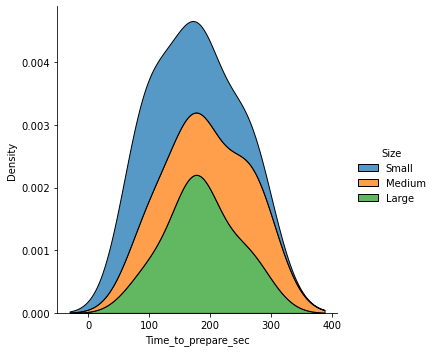

In [147]:
sns.displot(data=dataframe, x="Time_to_prepare_sec",hue="Size",kind="kde",multiple="stack")

We can also combine different plots into one figure

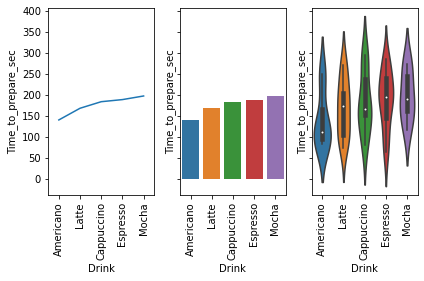

In [156]:
fig,axes=plt.subplots(1,3,sharey=True,sharex=True)
sns.lineplot(data=dataframe, y="Time_to_prepare_sec", x = "Drink",ci=None,ax=axes[0])
sns.barplot(data=dataframe, y="Time_to_prepare_sec", x = "Drink",ci=None,ax=axes[1])
sns.violinplot(data=dataframe, y="Time_to_prepare_sec", x = "Drink",ci=None,ax=axes[2])
for ax in axes:
    ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

We can also create an interaction plot. This plot might be useful if we assume a difference between our independent variables. For example, does the size of the drink influence the time to prepare it?
We indicate this with `hue` parameter.

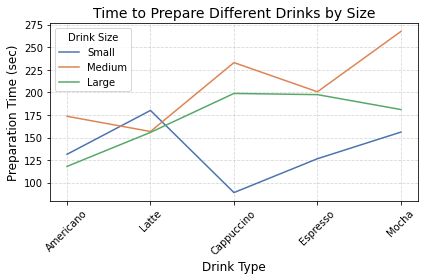

In [ ]:
sns.lineplot(data=dataframe, y="Time_to_prepare_sec", x="Drink",hue="Size",ci=None,palette="deep")
plt.title("Time to Prepare Different Drinks by Size", fontsize=14)
plt.xlabel("Drink Type", fontsize=12)
plt.ylabel("Preparation Time (sec)", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.legend(title="Drink Size")

There are, obviously, many many more plotting styles. You can find all of them [here](https://seaborn.pydata.org/tutorial/function_overview.html).

Anyways, after this short tutorial on plotting and data visualization, lets return to our koeln dataframe.

### Exercise

Visualize the column you picked from earlier, using the seaborn library. Add xlabels, ylabels and a title to your plot. If you want to, you can choose multiple columns and plot something interactive, using the `hue` parameter.

For example you might wonder, if the amount of people > 80 years old increased over the time of years in specific vedel?